In [46]:
%pylab qt
%matplotlib inline

import scipy.constants as cst
import scipy.special as spe
import random as rd
import fitting


def mysavefig(name):
    plt.tight_layout()
    plt.savefig(name, bbox_inches="tight", dpi=200)

def intensity_1d(x):
    return (spe.jv(1, np.pi*x)/np.pi/x)**2

def intensity_2d(x, y):
    N = len(x)
    Z = []
    for i in range(N):
        Z.append(np.zeros(N))
    Z = np.array(Z)
    for i, yval in enumerate(y):
        for j, xval in enumerate(x):
            r = np.sqrt(xval**2+yval**2)
            Z[i,j] = intensity_1d(r)
    return Z

Populating the interactive namespace from numpy and matplotlib


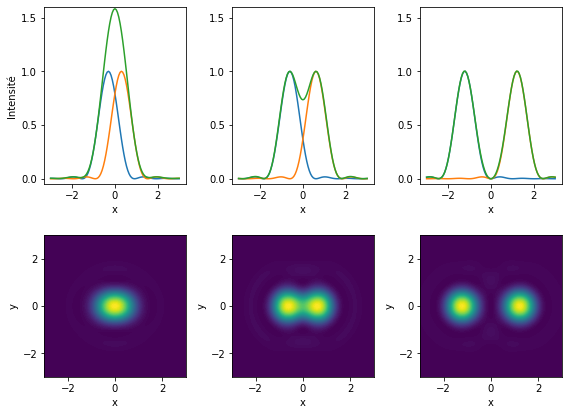

In [67]:
span = 3
x = np.linspace(-span, span, 101)
y = np.linspace(-span, span, 101)

plt.figure(figsize=(8,6))
sps = (2,3)

ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))
ax3 = plt.subplot2grid(sps, (0,2))
ax4 = plt.subplot2grid(sps, (1,0))
ax5 = plt.subplot2grid(sps, (1,1))
ax6 = plt.subplot2grid(sps, (1,2))

for d, axes in zip([0.61, 1.22, 2*1.22], [[ax1,ax4],[ax2,ax5],[ax3,ax6]]):
    ax1d, ax2d = axes
    
    val1 = intensity_1d(x+d/2)
    val2 = intensity_1d(x-d/2)
    vals = val1+val2
    scale = 1/np.max(val1)
    ax1d.plot(x, val1*scale, x,val2*scale, x,vals*scale)
    
    z1 = intensity_2d(x+d/2, y)
    z2 = intensity_2d(x-d/2, y)
    z  = z1+z2
    ax2d.contourf(x,y,z,101)
    
    ax1d.set_ylim(-0.05, 1.6)
    ax1d.set_yticks([0,0.5,1,1.5])
    if ax1d in [ax2, ax3]:
        #ax1d.set_yticklabels([])
        pass
    else:
        ax1d.set_ylabel("Intensité")
    ax1d.set_xlabel("x")
    
    ax2d.set_aspect("equal")
    ax2d.set_xticks([-2,0,2])
    ax2d.set_yticks([-2,0,2])
    ax2d.set_xlabel("x")
    ax2d.set_ylabel("y")
mysavefig("rayleigh.png")